**Name**: Achieng Kuir

CS/MATH:215

Prof. Wirfs-Brock

**Date**: May 3, 2025




#Project Overview: Exploring Global Life Expectancy Trends


This project aims to analyze global life expectancy data to uncover trends, correlations and the insights that can help understand the factors influencing life expectancy across different countries and regions. Using the data from Our Wolrd in Data, I will explore various aspects of life expectancy and present the findings through visualizations and statistical analysis.


**Goals of the project:**


*   Understanding global trends in life expectancy over time.

*   Compare life expectancy between different countries and regions

*   Investigate the correlations between life expectancy and other socio-economic factors such as GDP, healthcare and education levels.

*   Predict future life expectancy using regression models.



#Dataset:

The dataset I will use for this analysis is sourced from Our World in Data, which provides comprehensive life expectancy data for various countires from 1950-2023. To enrich the analysis, I will merge this dataset with additional datasets such as education levels, healthcare and GDP per capita.

Data Sources

- [Life Expectancy – Our World in Data](https://ourworldindata.org/life-expectancy)
- [GDP per Capita – World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD)
- [Education Level – Our World in Data](https://ourworldindata.org/global-education)
- [Public Health Expenditure – Our World in Data](https://ourworldindata.org/financing-healthcare)


**Methodology**

Data Cleaning and processing

*   Handling missing values, and inconsistencies.

**Descriptive Statistics**

*   Calculating mean, median, mode range and the standard deviation of the dataset.

**Trend Analysis**

*   Plotting life expectancy over time using line charts to identy the trends

**Comparative Analysis**


*  Comparing life expectancy between different countries using box plots


**Correlation Analysis**


*   Investgate the relationships between life expectancy and other variables using heatmap.


**Predictive Model**
*   Building a regression model to forecast future life expectancy.


**Clustering Analysis**

*   Cluster countries based on life expectancy and related variables using K-means clustering.


**Reflection:**

Working on this project really helped me understand the full data science process—from cleaning and merging multiple datasets to analyzing patterns and building models. I looked at how life expectancy is connected to things like GDP, education, and healthcare spending. For my new technique, I used linear regression, which I think we didn’t cover it in class. I learned it by looking through DataCamp, Googling stuff I didn’t understand, and getting help from ChatGPT  explaining how it works, I also used it to fix and improve my code. If I had more time, I’d finish the interactive map I started and try out other models like logistic regression but I got confused. Overall, this project helped me build my coding skills and also made me more curious about how data can explain real-world issues.







In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Upload the dataset into the colab notebook
from google.colab import files
uploaded = files.upload()

Saving life-expectancy.csv to life-expectancy.csv


In [3]:
df = pd.read_csv ('life-expectancy.csv')

In [4]:
df.rename(columns={'Period life expectancy at birth - Sex: total - Age: 0': 'LifeExpectancy'}, inplace=True)

In [5]:
df.head(20)

,Entity,Code,Year,LifeExpectancy
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
5,Afghanistan,AFG,1955,30.3660
6,Afghanistan,AFG,1956,30.8303
7,Afghanistan,AFG,1957,31.3451
8,Afghanistan,AFG,1958,31.8400
9,Afghanistan,AFG,1959,32.3365


In [6]:
df.isnull().sum()

,0
Entity,0
Code,1956
Year,0
LifeExpectancy,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          21565 non-null  object 
 1   Code            19609 non-null  object 
 2   Year            21565 non-null  int64  
 3   LifeExpectancy  21565 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 674.0+ KB


In [8]:
df.columns

Index(['Entity', 'Code', 'Year', 'LifeExpectancy'], dtype='object')

In [9]:
# Looking at the features in the dataset
df.describe()

,Year,LifeExpectancy
count,21565.000000,21565.000000
mean,1976.992812,61.942238
std,38.461606,12.925909
min,1543.000000,10.989100
25%,1962.000000,52.703000
50%,1982.000000,64.479900
75%,2003.000000,71.978900
max,2023.000000,86.372400


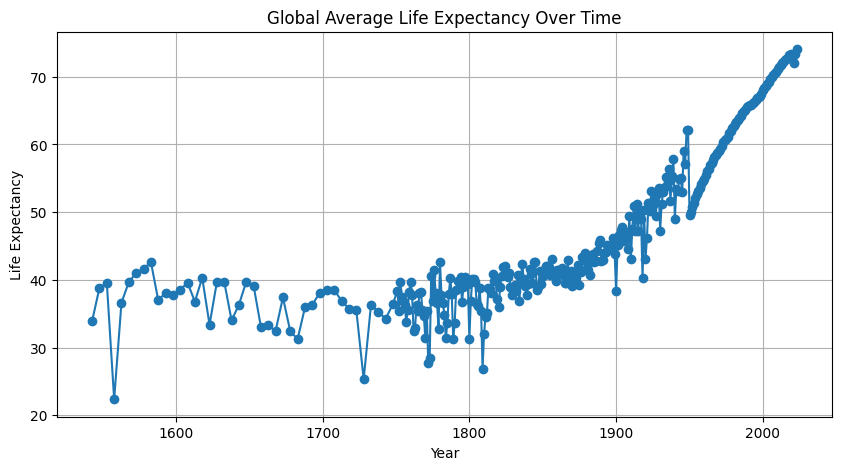

In [10]:
#Plotting global life expectancy trend over time.
trend = df.groupby('Year')['LifeExpectancy'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(trend['Year'], trend['LifeExpectancy'], marker='o')
plt.title('Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

**Interpretation:**

This chart above shows a steady rise in global average life expectancy, especially after the 1900s. For centuries, life expectancy stayed low, mostly between 30 and 40 years, with occasional dips like. Starting in the 20th century, life expectancy increased rapidly, surpassing 70 years by 2020.

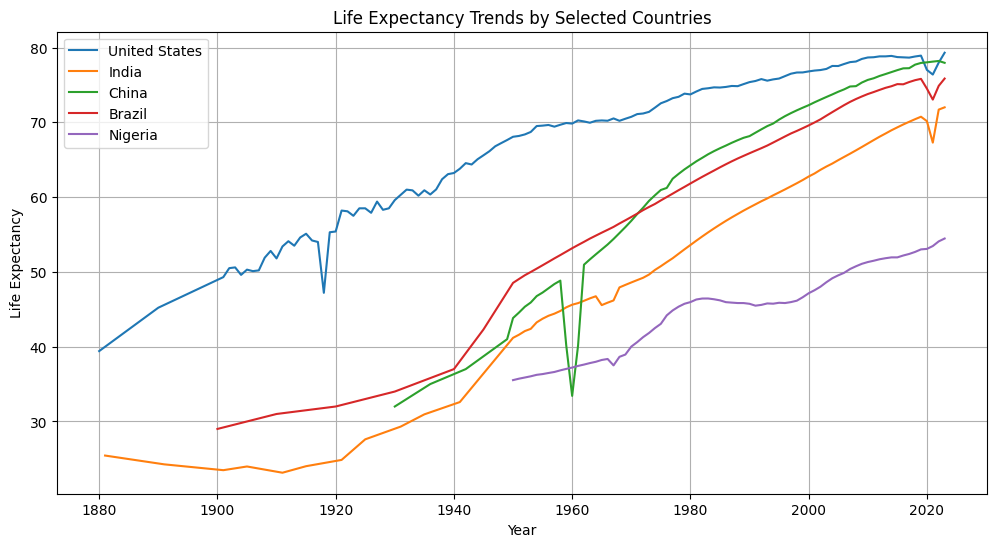

In [11]:
#Compare life expectancy across selected countries
countries = ['United States', 'India', 'China', 'Brazil', 'Nigeria']
subset = df[df['Entity'].isin(countries)]
plt.figure(figsize=(12, 6))
for country in countries:
    data = subset[subset['Entity'] == country]
    plt.plot(data['Year'], data['LifeExpectancy'], label=country)
plt.legend()
plt.title('Life Expectancy Trends by Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

**Interpretation:**

This chart above compares life expectancy trends over time for the selected countries: the United States, India, China, Brazil, and Nigeria. The United States consistently shows the highest life expectancy, though growth has slowed in recent decades. China and Brazil show sharp increases starting around the 1950s, with China eventually catching up to the U.S. India also shows steady improvement, especially after 1960. Nigeria, while improving, remains significantly lower than the others. The chart highlights global disparities, but also shows that most countries have made substantial progress in life expectancy over the past century.



In [12]:
#Upload the datasets into the colab notebook
from google.colab import files
uploaded = files.upload()

Saving gdp-per-capita-worldbank.csv to gdp-per-capita-worldbank.csv


In [13]:
gdp_df = pd.read_csv ('gdp-per-capita-worldbank.csv')

In [14]:
gdp_df.rename(columns={'GDP per capita, PPP (constant 2021 international $)': 'GDP_per_Capita'}, inplace=True)

In [15]:
gdp_df.head(20)

,Entity,Code,Year,GDP_per_Capita
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182
5,Afghanistan,AFG,2005,1908.1147
6,Afghanistan,AFG,2006,1929.7239
7,Afghanistan,AFG,2007,2155.3530
8,Afghanistan,AFG,2008,2191.5044
9,Afghanistan,AFG,2009,2565.0220


In [16]:
#Upload the dataset into the colab notebook
from google.colab import files
uploaded = files.upload()

Saving share-of-the-world-population-with-at-least-basic-education.csv to share-of-the-world-population-with-at-least-basic-education.csv


In [18]:
education_df = pd.read_csv ('share-of-the-world-population-with-at-least-basic-education.csv')

In [19]:
education_df.rename(columns={'Share of population with at least some basic education': 'Education_Level'}, inplace=True)

In [20]:
education_df.head(20)

,Entity,Code,Year,Share of population with no education,Education_Level
0,Argentina,ARG,1950,14.211617,85.788380
1,Argentina,ARG,1955,12.431603,87.568400
2,Argentina,ARG,1960,10.859231,89.140770
3,Argentina,ARG,1965,9.377147,90.622856
4,Argentina,ARG,1970,8.031716,91.968285
5,Argentina,ARG,1975,6.812619,93.187380
6,Argentina,ARG,1980,5.803711,94.196290
7,Argentina,ARG,1985,4.881450,95.118550
8,Argentina,ARG,1990,4.048860,95.951140
9,Argentina,ARG,1995,3.324677,96.675320


In [21]:
#Upload the dataset into the colab notebook
from google.colab import files
uploaded = files.upload()

Saving public-health-expenditure-share-gdp.csv to public-health-expenditure-share-gdp.csv


In [22]:
healthcare_df = pd.read_csv ('public-health-expenditure-share-gdp.csv')

In [23]:
healthcare_df.rename(columns={'Public health expenditure as a share of GDP': 'Healthcare_Expenditure'}, inplace=True)

In [24]:
healthcare_df.head(20)

,Entity,Code,Year,Healthcare_Expenditure
0,Argentina,ARG,1880,0.000
1,Argentina,ARG,1890,0.000
2,Argentina,ARG,1900,0.000
3,Argentina,ARG,1910,0.000
4,Argentina,ARG,1920,0.000
5,Argentina,ARG,1930,0.000
6,Argentina,ARG,2000,4.499
7,Argentina,ARG,2001,4.594
8,Argentina,ARG,2002,4.034
9,Argentina,ARG,2003,3.774


In [25]:
gdp_df = gdp_df[['Entity', 'Year', 'GDP_per_Capita']]
education_df = education_df[['Entity', 'Year', 'Education_Level']]
healthcare_df = healthcare_df[['Entity', 'Year', 'Healthcare_Expenditure']]

In [26]:
##Merging the dataset with Education, healthcare and GPD per capita datasets
merged_df = pd.merge(df, gdp_df, on=['Entity', 'Year'], how='inner')
merged_df = pd.merge(merged_df, education_df, on=['Entity', 'Year'], how='inner')
merged_df = pd.merge(merged_df, healthcare_df, on=['Entity', 'Year'], how='inner')

# Drop rows with any missing values (optional but recommended)
merged_df.dropna(inplace=True)


In [27]:
merged_df.head(20)

,Entity,Code,Year,LifeExpectancy,GDP_per_Capita,Education_Level,Healthcare_Expenditure
0,Argentina,ARG,2000,73.9100,22281.380,97.246600,4.499
1,Argentina,ARG,2005,75.2306,23262.408,97.732800,3.915
2,Argentina,ARG,2010,75.6800,28056.258,98.150710,5.572
3,Argentina,ARG,2015,76.5995,28669.207,98.491610,6.853
4,Argentina,ARG,2020,75.8781,23877.094,98.737770,6.644
5,Australia,AUS,1990,77.0414,35669.640,98.618190,4.280
6,Australia,AUS,1995,78.2569,38014.330,98.741550,4.590
7,Australia,AUS,2000,79.6207,44347.070,98.868770,5.189
8,Australia,AUS,2005,81.0923,49176.060,99.016720,5.448
9,Australia,AUS,2010,82.0132,51811.780,99.186080,5.778


In [28]:
merged_df.describe()

,Year,LifeExpectancy,GDP_per_Capita,Education_Level,Healthcare_Expenditure
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,2006.280000,76.477257,36134.446542,96.171697,5.471448
std,9.544125,5.607549,17644.427984,7.167291,2.732592
min,1990.000000,53.914200,3099.503000,57.768917,0.585000
25%,2000.000000,74.085000,19751.621000,94.864914,3.615000
50%,2005.000000,77.588600,40988.400000,98.737770,5.496000
75%,2015.000000,80.565800,50391.234000,99.990234,7.308000
max,2020.000000,84.670300,67352.390000,100.000000,15.694000


In [29]:
merged_df.shape

(125, 7)

In [30]:
merged_df.columns

Index(['Entity', 'Code', 'Year', 'LifeExpectancy', 'GDP_per_Capita',
       'Education_Level', 'Healthcare_Expenditure'],
      dtype='object')

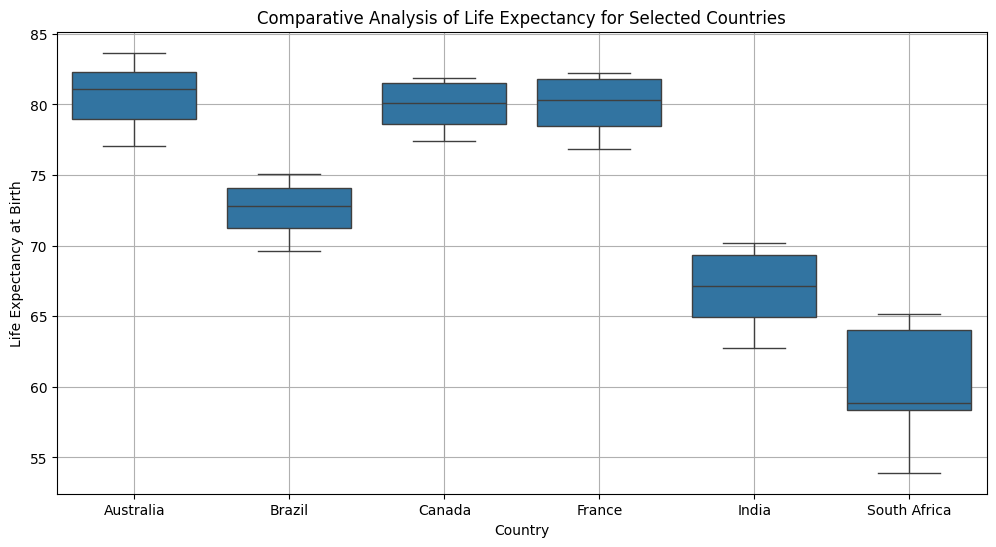

In [31]:
# Comparative Analysis of Life Expectancy using Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=merged_df[merged_df['Entity'].isin(['Canada', 'Brazil', 'South Africa', 'France', 'India', 'Australia'])],
    x='Entity',
    y='LifeExpectancy'
)
plt.title('Comparative Analysis of Life Expectancy for Selected Countries')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth')
plt.grid(True)
plt.show()


**Interpretation:**

This box plot above compares life expectancy at birth across six countries. Australia, Canada, and France show the highest median life expectancy, with values above 80 years and relatively small variation. Brazil and India have lower medians, around the mid-70s and upper 60s respectively, with India showing slightly more spread. South Africa has the lowest and most variable life expectancy, indicating greater inequality or instability in health outcomes. Overall, the plot highlights stark differences in life expectancy between more developed and less developed countries.

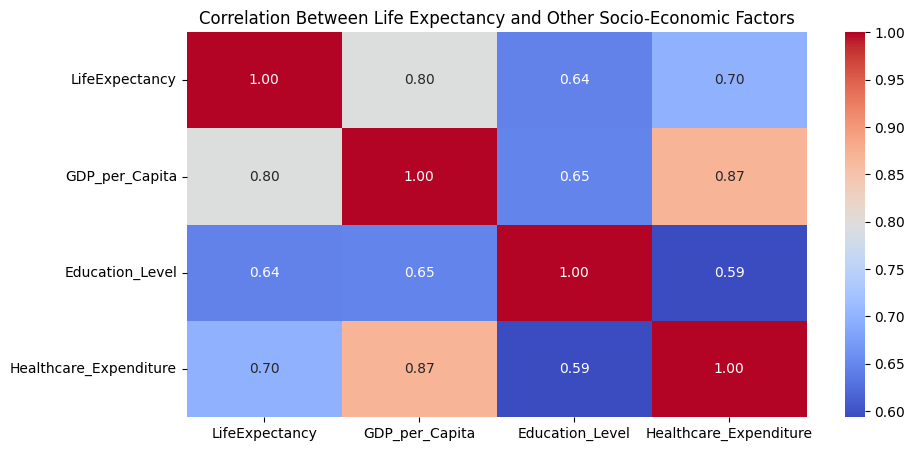

In [32]:
#Correlation analysis between the variables
plt.figure(figsize=(10,5))
sns.heatmap(merged_df[['LifeExpectancy', 'GDP_per_Capita', 'Education_Level', 'Healthcare_Expenditure']].corr(),
annot=True, cmap='coolwarm',
fmt='.2f'
)

plt.title('Correlation Between Life Expectancy and Other Socio-Economic Factors')
plt.show()

**Interpretation:**

This correlation heatmap shows how life expectancy relates to GDP per capita, education level, and healthcare expenditure. Life expectancy is most strongly correlated with GDP per capita (0.80), followed by healthcare expenditure (0.70) and education level (0.64). This suggests that countries with higher economic output and investment in health and education tend to have higher life expectancy. The heatmap also shows a very strong correlation (0.87) between GDP per capita and healthcare expenditure, indicating that wealthier countries tend to spend more on health. Overall, the image highlights the interconnectedness of economic and social factors in shaping life expectancy outcomes.

In [33]:
#Regression Modeling
from sklearn.linear_model import LinearRegression

#Defining the predictors (x) and target (y)
x = merged_df[['GDP_per_Capita', 'Education_Level', 'Healthcare_Expenditure']]
y = merged_df['LifeExpectancy']

#Initializing and fitting the model
model = LinearRegression()
model.fit(x, y)

#Printing model coefficients
print('Regression Coefficients:')
for feature, coef in zip(x.columns, model.coef_):
  print(f'{feature}: {coef:.4f}')

print(f'Intercept: {model.intercept_:2f}')

Regression Coefficients:
GDP_per_Capita: 0.0002
Education_Level: 0.1746
Healthcare_Expenditure: 0.0110
Intercept: 52.201084


**Interpretation:**

The linear regression model estimates life expectancy based on the GDP per capita, education level, and healthcare expenditure. Each coefficient shows how much life expectancy is expected when that variable increases by one unit, holding all the other constant.



*   Holding everything else constant, a $1 increase in GPD per capita is associated with a 0.0002 year increase in life expectancy.

*   Holding everything else constant, a 1% point increase in education level is associated with 0.1746 year increase in life expectancy.

*   Holding everything else constant, a 1% point increase in healthcare spending increase life expectancy by 0.0110 years.

*   The intercept is 52.2 years, which serves as the baseline of the model.


**Regression Equation**

Life Expectancy=52.20+0.0002⋅GDP_per_Capita+0.1746⋅Education_Level+0.0110⋅Healthcare_Expenditure




**Predicting Future life Expectancy.**

Using our model, we can estimate what life expectancy might look like hypothetically speaking. Suppose a country improves its GDP per Capita to $50, 000, Education level at 90% and 10% on Healthcare.

In [34]:
# Predict life expectancy for a hypothetical future country
future_scenario = pd.DataFrame({
    'GDP_per_Capita': [50000],
    'Education_Level': [90],
    'Healthcare_Expenditure': [10]
})

predicted_life_expectancy = model.predict(future_scenario)
print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]:.2f} years")


Predicted Life Expectancy: 78.30 years


In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = merged_df[['LifeExpectancy', 'GDP_per_Capita', 'Education_Level', 'Healthcare_Expenditure']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# View cluster assignments
print(merged_df['Cluster'].value_counts())


Cluster
1    83
2    37
0     5
Name: count, dtype: int64


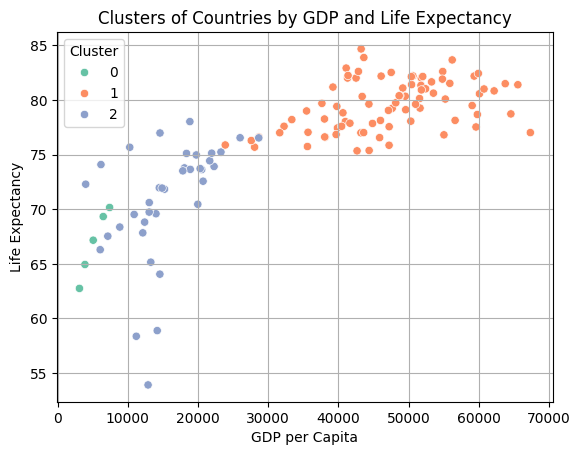

In [36]:
sns.scatterplot(
    data=merged_df,
    x='GDP_per_Capita',
    y='LifeExpectancy',
    hue='Cluster',
    palette='Set2'
)
plt.title('Clusters of Countries by GDP and Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()


**Interpretation:**

This scatter plot shows how countries are grouped into three clusters based on their GDP per capita and life expectancy using K-Means clustering. Cluster 1 (orange) includes countries with high GDP and high life expectancy, likely representing wealthier, developed nations. Cluster 2 (blue) consists of countries with moderate GDP and life expectancy, suggesting emerging economies. Cluster 0 (green) represents countries with lower GDP and lower life expectancy, often associated with lower-income nations. The overall pattern highlights a strong positive relationship between a country's economic wealth and the health outcomes of its population